# Project Notes

This project was designed as a demo to show how to use the Jupyter notebook ChIP-Seq workflow. The data processed is from the paper: [Binding of HMGN proteins to cell specific enhancers stabilizes cell identity.](https://www.ncbi.nlm.nih.gov/pubmed/30532006).


### Requirements

 1. Python 3.7
    - numpy
    - scipy
    - pandas
    - seaborn
    - matplotlib
    - jupyter
    - cwltool
    - goenrichment
 2. CWL Tools definition files: [cwl-workflow](https://gitlab.com/r78v10a07/cwl-workflow/)       

In [1]:
%run ../config/init.py

from jupyterngsplugin.markdown.fastqc import fastqc_table, fastqc_trimmomatic_table
from jupyterngsplugin.markdown.alignment import alignment_table
from jupyterngsplugin.markdown.alignment import reads_distribution_plot
from jupyterngsplugin.markdown.phantompeakqualtools import qc_table
from jupyterngsplugin.markdown.chipseq import diffbind_table
from jupyterngsplugin.markdown.utils import hide_code_str, get_link_image, get_link_name
from jupyterngsplugin.utils.notebook import save_2_html
HTML(hide_code_str())

## 1. Sample retrieval from SRA database and quality control

### BioProject ID: PRJNA481982

In [2]:
data_dir = os.path.join(DATA, DATASET)
os.chdir(data_dir)
samples = [ f.replace('.fastq.gz','') for ds,dr,fs in os.walk('./') for f in fs if f.endswith('.fastq.gz')]
samples.sort()

In [3]:
os.chdir(NOTEBOOKS)
name = '01 - SRA Sample Retrieval and pre-processing QC'
str_msg = '<a href="' + name.replace(' ', '%20') + '.ipynb" target="_blank">' + name + '</a>\n'
display(Markdown(str_msg))

str_msg = '#### FastQC report\n'
display(Markdown(str_msg))
samples_data, str_msg =  fastqc_table(samples, 
                                      os.path.join(DATA, DATASET),
                                      os.path.join(DATA, DATASET))
display(Markdown(str_msg))
del str_msg

<a href="01%20-%20SRA%20Sample%20Retrieval%20and%20pre-processing%20QC.ipynb" target="_blank">01 - SRA Sample Retrieval and pre-processing QC</a>


#### FastQC report


| Sample | Fastq | FastQC<br>Report | No of Reads<br>in fastq | Seq<br> Len | %GC | Poor<br>Quality | Fail<br>Tests |
| --- | --- | --- |--- | --- | --- | --- | --- |
| SRR7549105_1|  <a href="../data/PRJNA481982/SRR7549105_1.fastq.gz" target="_blank">1947.57MB</a> | <a href="../data/PRJNA481982/SRR7549105_1_fastqc.html" target="_blank">0.20MB</a> |60,082,224|20-76|44|0|Per sequence GC content|
| SRR7549105_2|  <a href="../data/PRJNA481982/SRR7549105_2.fastq.gz" target="_blank">2014.99MB</a> | <a href="../data/PRJNA481982/SRR7549105_2_fastqc.html" target="_blank">0.20MB</a> |60,082,224|20-76|44|0|Per sequence GC content|
| SRR7549106_1|  <a href="../data/PRJNA481982/SRR7549106_1.fastq.gz" target="_blank">2062.49MB</a> | <a href="../data/PRJNA481982/SRR7549106_1_fastqc.html" target="_blank">0.20MB</a> |63,964,512|20-76|44|0|Per sequence GC content|
| SRR7549106_2|  <a href="../data/PRJNA481982/SRR7549106_2.fastq.gz" target="_blank">2129.34MB</a> | <a href="../data/PRJNA481982/SRR7549106_2_fastqc.html" target="_blank">0.20MB</a> |63,964,512|20-76|44|0|Per sequence GC content|
| SRR7549109_1|  <a href="../data/PRJNA481982/SRR7549109_1.fastq.gz" target="_blank">1697.02MB</a> | <a href="../data/PRJNA481982/SRR7549109_1_fastqc.html" target="_blank">0.20MB</a> |51,815,320|20-76|44|0||
| SRR7549109_2|  <a href="../data/PRJNA481982/SRR7549109_2.fastq.gz" target="_blank">1782.09MB</a> | <a href="../data/PRJNA481982/SRR7549109_2_fastqc.html" target="_blank">0.21MB</a> |51,815,320|20-76|44|0||
| SRR7549110_1|  <a href="../data/PRJNA481982/SRR7549110_1.fastq.gz" target="_blank">1492.55MB</a> | <a href="../data/PRJNA481982/SRR7549110_1_fastqc.html" target="_blank">0.20MB</a> |44,661,434|20-76|44|0||
| SRR7549110_2|  <a href="../data/PRJNA481982/SRR7549110_2.fastq.gz" target="_blank">1582.55MB</a> | <a href="../data/PRJNA481982/SRR7549110_2_fastqc.html" target="_blank">0.21MB</a> |44,661,434|20-76|44|0||
| SRR7549113_1|  <a href="../data/PRJNA481982/SRR7549113_1.fastq.gz" target="_blank">1519.91MB</a> | <a href="../data/PRJNA481982/SRR7549113_1_fastqc.html" target="_blank">0.20MB</a> |43,126,548|20-76|43|0|Per sequence GC content|
| SRR7549113_2|  <a href="../data/PRJNA481982/SRR7549113_2.fastq.gz" target="_blank">1585.86MB</a> | <a href="../data/PRJNA481982/SRR7549113_2_fastqc.html" target="_blank">0.21MB</a> |43,126,548|20-76|43|0|Per sequence GC content|
| SRR7549114_1|  <a href="../data/PRJNA481982/SRR7549114_1.fastq.gz" target="_blank">1640.04MB</a> | <a href="../data/PRJNA481982/SRR7549114_1_fastqc.html" target="_blank">0.20MB</a> |46,752,877|20-76|43|0|Per sequence GC content|
| SRR7549114_2|  <a href="../data/PRJNA481982/SRR7549114_2.fastq.gz" target="_blank">1709.32MB</a> | <a href="../data/PRJNA481982/SRR7549114_2_fastqc.html" target="_blank">0.21MB</a> |46,752,877|20-76|43|0|Per sequence GC content|


## 2. Trimming and quality control

### Trimmomatic options

 * IlluminaClip: TruSeq3-SE.fa:2:30:10
 * Minlen: 30
 * Avgqual: 30
 * Leading: 30
 * Trailing: 30

In [4]:
os.chdir(NOTEBOOKS)
name = '02 - Samples trimming'
str_msg = '<a href="' + name.replace(' ', '%20') + '.ipynb" target="_blank">' + name + '</a>\n\n'
display(Markdown(str_msg))

samples_data, str_msg =  fastqc_trimmomatic_table(samples_data, samples, 
                                      os.path.join(RESULTS, DATASET, 'trimmomatic'))

display(Markdown(str_msg))
del str_msg

<a href="02%20-%20Samples%20trimming.ipynb" target="_blank">02 - Samples trimming</a>



| Sample | Trimmed<br>Fastq | FastQC<br>Report | No of Reads<br>in fastq |Removed<br>Reads | Seq<br> Len | %GC | Poor<br>Quality | Fail<br>Tests |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SRR7549105_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549105_1.fastq.gz" target="_blank">1839.14MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549105_1_fastqc.html" target="_blank">207.89KB</a> |56,808,617|3,273,607|30-76|44|0|Per sequence GC content|
| SRR7549105_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549105_2.fastq.gz" target="_blank">1911.84MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549105_2_fastqc.html" target="_blank">213.60KB</a> |56,808,617|3,273,607|29-76|44|0|Per sequence GC content|
| SRR7549106_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549106_1.fastq.gz" target="_blank">1949.88MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549106_1_fastqc.html" target="_blank">208.42KB</a> |60,542,861|3,421,651|29-76|44|0|Per sequence GC content|
| SRR7549106_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549106_2.fastq.gz" target="_blank">2021.48MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549106_2_fastqc.html" target="_blank">216.15KB</a> |60,542,861|3,421,651|29-76|44|0|Per sequence GC content|
| SRR7549109_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549109_1.fastq.gz" target="_blank">1512.59MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549109_1_fastqc.html" target="_blank">214.67KB</a> |47,139,018|4,676,302|32-76|44|0||
| SRR7549109_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549109_2.fastq.gz" target="_blank">1578.58MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549109_2_fastqc.html" target="_blank">216.35KB</a> |47,139,018|4,676,302|30-76|44|0||
| SRR7549110_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549110_1.fastq.gz" target="_blank">1308.14MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549110_1_fastqc.html" target="_blank">214.02KB</a> |40,004,712|4,656,722|32-76|44|0||
| SRR7549110_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549110_2.fastq.gz" target="_blank">1380.29MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549110_2_fastqc.html" target="_blank">214.53KB</a> |40,004,712|4,656,722|31-76|44|0||
| SRR7549113_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549113_1.fastq.gz" target="_blank">1307.31MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549113_1_fastqc.html" target="_blank">213.87KB</a> |37,847,175|5,279,373|32-76|43|0|Per sequence GC content|
| SRR7549113_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549113_2.fastq.gz" target="_blank">1354.88MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549113_2_fastqc.html" target="_blank">213.58KB</a> |37,847,175|5,279,373|30-76|43|0|Per sequence GC content|
| SRR7549114_1|  <a href="../results/PRJNA481982/trimmomatic/SRR7549114_1.fastq.gz" target="_blank">1410.32MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549114_1_fastqc.html" target="_blank">212.04KB</a> |41,042,230|5,710,647|32-76|43|0|Per sequence GC content|
| SRR7549114_2|  <a href="../results/PRJNA481982/trimmomatic/SRR7549114_2.fastq.gz" target="_blank">1459.77MB</a> | <a href="../results/PRJNA481982/trimmomatic/SRR7549114_2_fastqc.html" target="_blank">217.51KB</a> |41,042,230|5,710,647|32-76|43|0|Per sequence GC content|


## 3. Alignments

In [5]:
os.chdir(NOTEBOOKS)
name = '03 - Alignments'
str_msg = '<a href="' + name.replace(' ', '%20') + '.ipynb" target="_blank">' + name + '</a>\n'
str_msg += '### Reference genome\n**mm9**\n\n'
str_msg += '| Sample | Sorted<br>BAM | BAM<br>Index | STATS'
str_msg += '| Mapped<br>reads | Un-Mapped<br>reads | Properly<br>paired<br>reads (%) '
str_msg += '| Total<br>first<br>fragment<br>length '
str_msg += '| Bases<br>mapped '
str_msg += '| Bases<br>mapped<br>(cigar) '
str_msg += '| Mismatches '
str_msg += '| Error<br>rate '
str_msg += '| Average<br>length '
str_msg += '| Average<br>quality '
str_msg += '|\n| --- | --- | --- | --- '
str_msg += '| --- | --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '| --- '
str_msg += '|\n'
samples = [ f.replace('_sorted.bam', '') for ds,dr,fs in os.walk(os.path.join(RESULTS, DATASET, 'alignments')) for f in fs if f.endswith('_sorted.bam')]
samples_data, str_msg =  alignment_table(samples_data, samples, os.path.join(RESULTS, DATASET, 'alignments'), 'BWA_paired') 
display(Markdown(str_msg))
del str_msg


| Sample | Sorted<br>BAM | BAM<br>Index | STATS| Mapped<br>reads | Un-Mapped<br>reads | Properly<br>paired<br>reads (%) | Total<br>first<br>fragment<br>length | Bases<br>mapped | Bases<br>mapped<br>(cigar) | Mismatches | Error<br>rate | Average<br>length | Average<br>quality |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SRR7549105|  <a href="../results/PRJNA481982/alignments/SRR7549105_sorted.bam" target="_blank">3887.71MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549105_sorted.bam.bai" target="_blank">2.18MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549105.stats" target="_blank">102.93KB</a> |113,374,741 |242,493 |96.8 |4,139,173,153 |8,200,237,129 |8,169,376,378 |35,802,274 |4.38e-03 |72 |35.1 |
| SRR7549113|  <a href="../results/PRJNA481982/alignments/SRR7549113_sorted.bam" target="_blank">3009.11MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549113_sorted.bam.bai" target="_blank">2.07MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549113.stats" target="_blank">49.30KB</a> |75,410,255 |284,095 |98.1 |2,553,036,456 |5,016,704,480 |4,997,663,027 |20,871,783 |4.18e-03 |66 |34.8 |
| SRR7549110|  <a href="../results/PRJNA481982/alignments/SRR7549110_sorted.bam" target="_blank">3149.92MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549110_sorted.bam.bai" target="_blank">2.15MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549110.stats" target="_blank">47.75KB</a> |79,787,393 |222,031 |98.7 |2,815,550,915 |5,509,545,150 |5,495,313,710 |17,605,483 |3.20e-03 |69 |35.0 |
| MEF|  <a href="../results/PRJNA481982/alignments/MEF_sorted.bam" target="_blank">6332.70MB</a> | ---  | --- | --- | --- | --- |
| SRR7549114|  <a href="../results/PRJNA481982/alignments/SRR7549114_sorted.bam" target="_blank">3241.10MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549114_sorted.bam.bai" target="_blank">2.11MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549114.stats" target="_blank">50.84KB</a> |81,776,179 |308,281 |98.1 |2,764,626,705 |5,436,037,081 |5,415,648,379 |22,363,343 |4.13e-03 |66 |34.8 |
| rB|  <a href="../results/PRJNA481982/alignments/rB_sorted.bam" target="_blank">5886.47MB</a> | ---  | --- | --- | --- | --- |
| SRR7549109|  <a href="../results/PRJNA481982/alignments/SRR7549109_sorted.bam" target="_blank">3599.10MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549109_sorted.bam.bai" target="_blank">2.25MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549109.stats" target="_blank">48.03KB</a> |94,100,490 |177,546 |98.6 |3,329,047,471 |6,556,803,138 |6,542,988,117 |19,699,912 |3.01e-03 |69 |35.1 |
| SRR7549106|  <a href="../results/PRJNA481982/alignments/SRR7549106_sorted.bam" target="_blank">4113.33MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549106_sorted.bam.bai" target="_blank">2.22MB</a> | <a href="../results/PRJNA481982/alignments/SRR7549106.stats" target="_blank">52.88KB</a> |120,832,967 |252,755 |97.1 |4,408,487,732 |8,741,515,938 |8,707,782,167 |38,974,099 |4.48e-03 |72 |35.1 |
| ES|  <a href="../results/PRJNA481982/alignments/ES_sorted.bam" target="_blank">7348.21MB</a> | ---  | --- | --- | --- | --- |


### Distribution of Reads

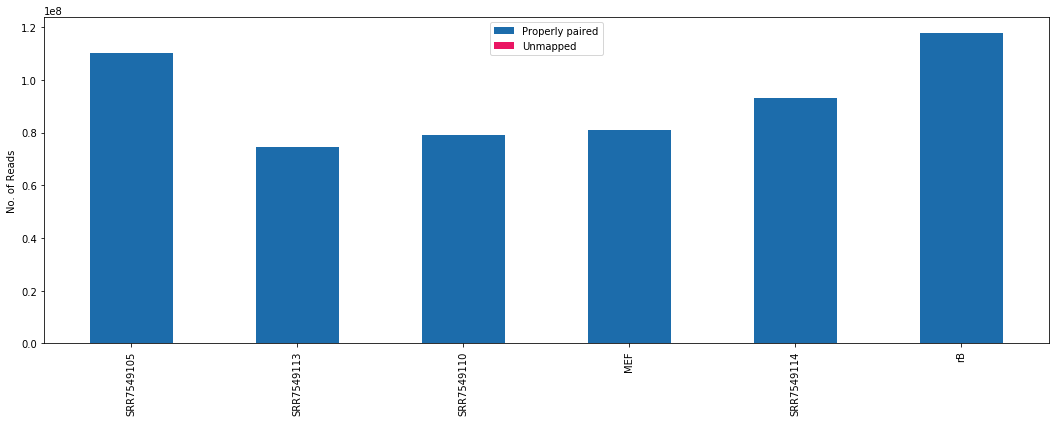

In [6]:
N = 0
mapped = []
unmapped = []
for s in samples:
    if s in samples_data:
        if 'alignment' in samples_data[s]:
            N += 1
            mapped.append(samples_data[s]['alignment']['properly paired'])
            unmapped.append(samples_data[s]['alignment']['unmapped'])
ind = np.arange(N) 
width = 0.50 

if mapped and unmapped:
    plt.figure(figsize=(18, 6)) 
    p2 = plt.bar(ind, unmapped, width, color='#ea1563')
    p1 = plt.bar(ind, mapped, width, bottom=np.array(unmapped), color='#1c6cab')

    plt.ylabel('No. of Reads')
    plt.xticks(ind, samples, rotation='vertical')
    plt.legend((p1[0], p2[0]), ('Properly paired', 'Unmapped'))

    plt.show()
    plt.close()

### Alignment QC with Phantompeakqualtools

See https://github.com/kundajelab/phantompeakqualtools for more detailed info about the Phantompeakqualtools parameters

| Sample | numReads | estFragLen | corr_estFragLen | phantomPeak | corr_phantomPeak | argmin_corr | min_corr | NSC | RSC | QualityTag | strand-shift cc |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SRR7549105| 9.45e+07 |160<br> |0.63<br> |80 |0.60 |1500 |0.57 |1.12 |2.00 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549105_sorted.tagAlign.cc.plot.pdf" target="_blank">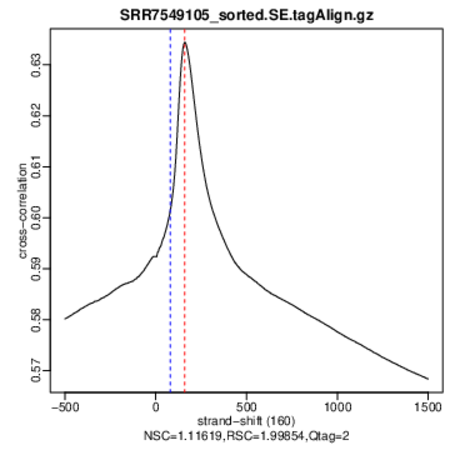
| SRR7549113| 6.46e+07 |150<br>330<br>345<br> |0.55<br>0.51<br>0.51<br> |75 |0.51 |1500 |0.47 |1.17 |2.00 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549113_sorted.tagAlign.cc.plot.pdf" target="_blank">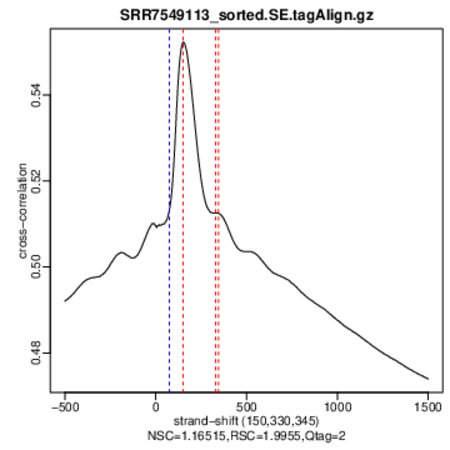
| SRR7549110| 7.32e+07 |140<br>495<br>695<br> |0.59<br>0.53<br>0.53<br> |80 |0.55 |1500 |0.51 |1.16 |1.78 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549110_sorted.tagAlign.cc.plot.pdf" target="_blank">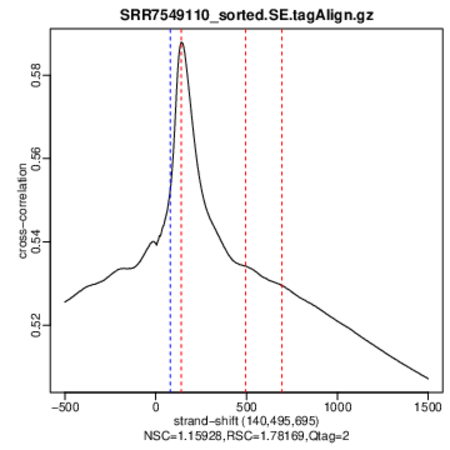
| MEF|  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SRR7549114| 7.00e+07 |155<br>335<br>315<br> |0.57<br>0.53<br>0.53<br> |75 |0.53 |1500 |0.49 |1.16 |1.98 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549114_sorted.tagAlign.cc.plot.pdf" target="_blank">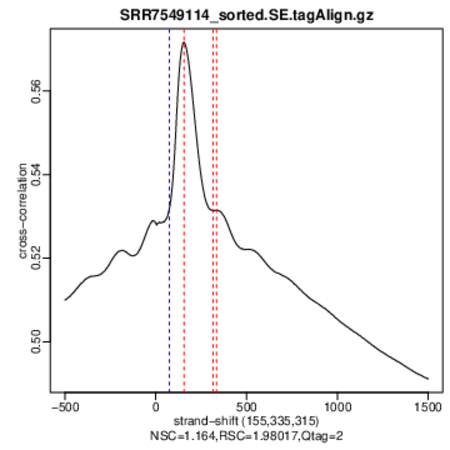
| rB|  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| SRR7549109| 8.62e+07 |145<br>480<br>490<br> |0.62<br>0.56<br>0.56<br> |80 |0.58 |1500 |0.53 |1.16 |1.74 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549109_sorted.tagAlign.cc.plot.pdf" target="_blank">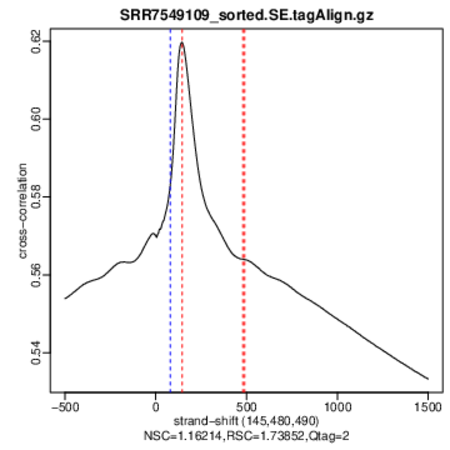
| SRR7549106| 1.01e+08 |160<br>665<br>1,120<br> |0.65<br>0.60<br>0.59<br> |80 |0.61 |1500 |0.58 |1.11 |1.96 |2.00 | <a href="../results/PRJNA481982/alignments/SRR7549106_sorted.tagAlign.cc.plot.pdf" target="_blank">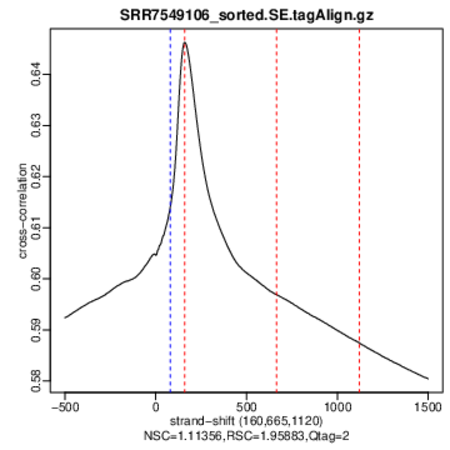
| ES|  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |


Click on figure to retrieve original PDF file



In [7]:
img_size = 450
os.chdir(NOTEBOOKS)
str_msg = qc_table(samples, os.path.join(RESULTS, DATASET, 'alignments'), img_size, img_size)

str_msg += '\nClick on figure to retrieve original PDF file\n\n'
display(Markdown(str_msg))
del str_msg

## 4. Peak calling and Irreproducible Discovery Rate (IDR)


## Condition: rB

Annotated peak file:  <a href="../results/PRJNA481982/idr/rB_annotation.txt" target="_blank">rB_annotation.txt</a>

IDR peaks: 46678

| Default  peaks | No alternate<br>summit peaks |
| --- | --- |
 |  <a href="../results/PRJNA481982/idr/rB.png" target="_blank">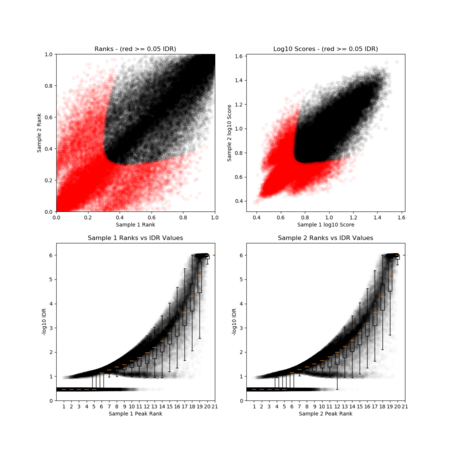 |  <a href="../results/PRJNA481982/idr/rB.noalternatesummitpeaks.png" target="_blank">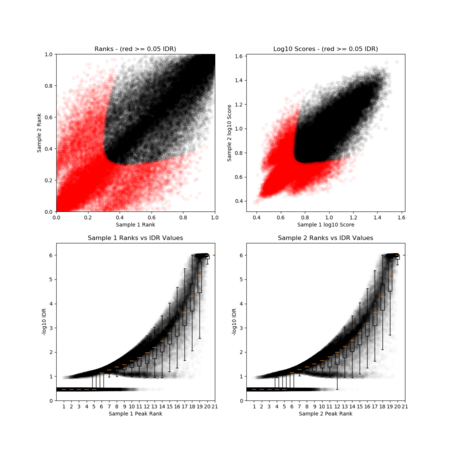 |



## Condition: ES

Annotated peak file:  <a href="../results/PRJNA481982/idr/ES_annotation.txt" target="_blank">ES_annotation.txt</a>

IDR peaks: 57725

| Default  peaks | No alternate<br>summit peaks |
| --- | --- |
 |  <a href="../results/PRJNA481982/idr/ES.png" target="_blank">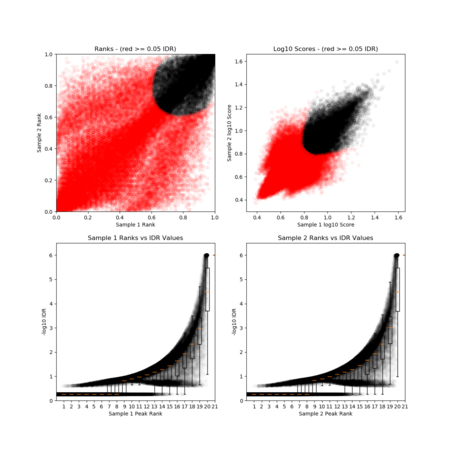 |  <a href="../results/PRJNA481982/idr/ES.noalternatesummitpeaks.png" target="_blank">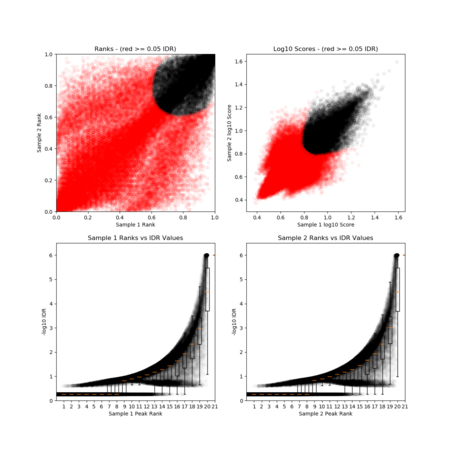 |



## Condition: MEF

Annotated peak file:  <a href="../results/PRJNA481982/idr/MEF_annotation.txt" target="_blank">MEF_annotation.txt</a>

IDR peaks: 102051

| Default  peaks | No alternate<br>summit peaks |
| --- | --- |
 |  <a href="../results/PRJNA481982/idr/MEF.png" target="_blank">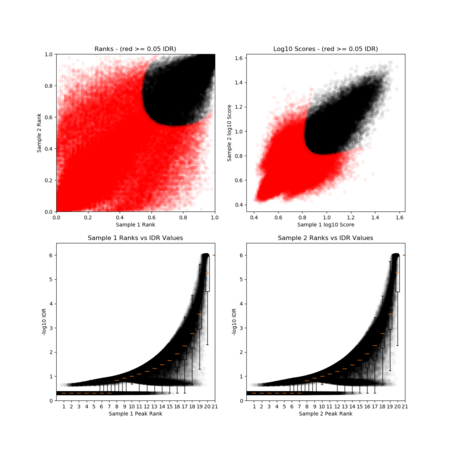 |  <a href="../results/PRJNA481982/idr/MEF.noalternatesummitpeaks.png" target="_blank">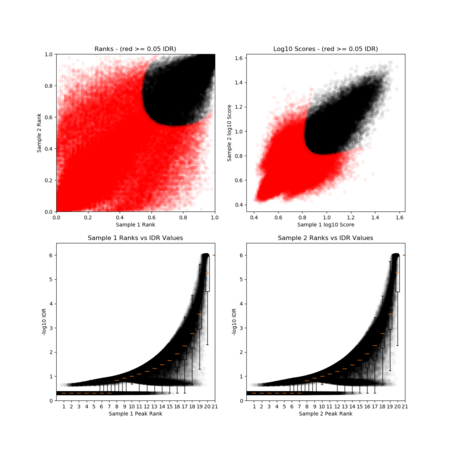 |


In [8]:
img_size = 450
os.chdir(NOTEBOOKS)
result_dir = os.path.join(RESULTS, DATASET, 'idr')
factors = pandas.read_csv(os.path.join(DATA, DATASET, 'factors.txt'), sep='\t')
for c in factors['condition'].unique():
    str_msg = '\n## Condition: {0}\n\n'.format(c)
    f = os.path.relpath(os.path.join(result_dir, c + '_annotation.txt'))
    str_msg += 'Annotated peak file: ' 
    str_msg += get_link_name(f, ifempty="")
    peaks = !wc -l {f}
    if len(peaks) == 1:
        str_msg += '\n\nIDR peaks: ' + str(int(peaks[0].split(' ')[0]) - 1)
    str_msg += '\n\n| Default  peaks | No alternate<br>summit peaks |\n'
    str_msg += '| --- | --- |\n'
    f = os.path.relpath(os.path.join(result_dir, c + '.png'))
    str_msg += ' | ' + get_link_image(f, img_size, img_size, ' --- ')
    f = os.path.relpath(os.path.join(result_dir, c + '.noalternatesummitpeaks.png'))
    str_msg += ' | ' + get_link_image(f, img_size, img_size, ' --- ')
    str_msg += ' |\n'
    display(Markdown(str_msg))
del str_msg

## 5. Differential binding analysis

### Condition: rB vs ES

| Deseq2 | EdgeR |
| --- | --- |
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plot.png" target="_blank">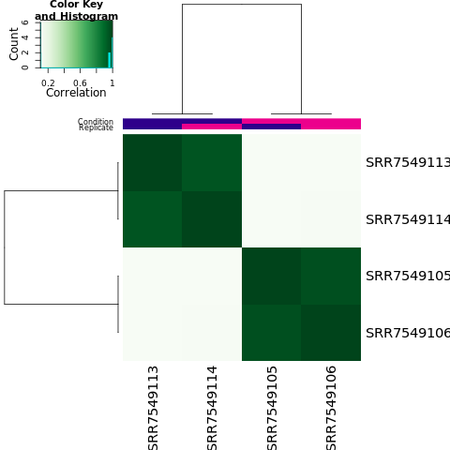|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plot.png" target="_blank">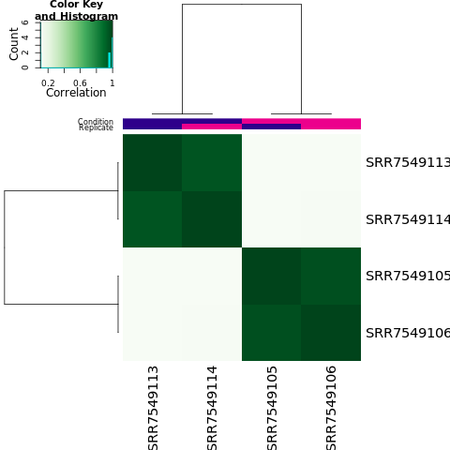|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotHeatmap.png" target="_blank">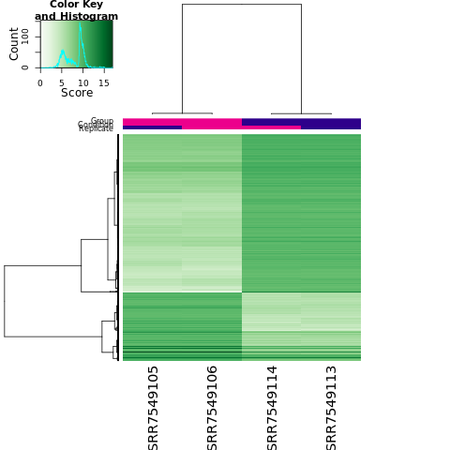|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotHeatmap.png" target="_blank">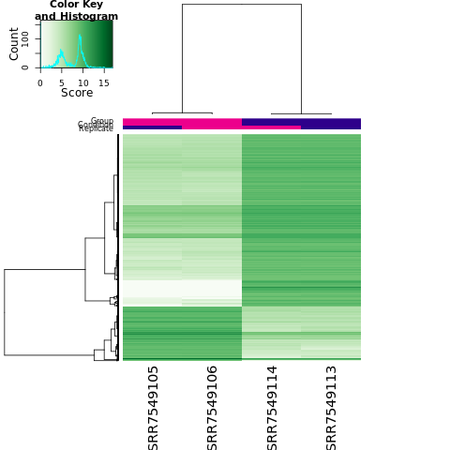|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotMA.png" target="_blank">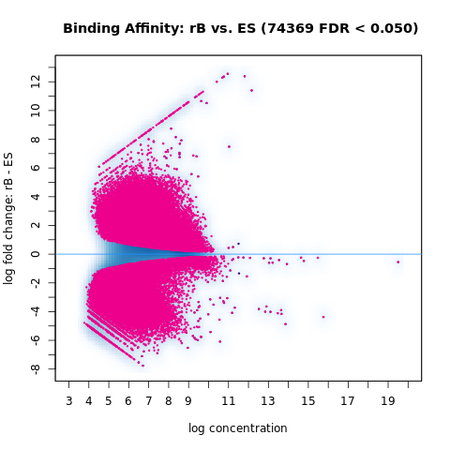|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotMA.png" target="_blank">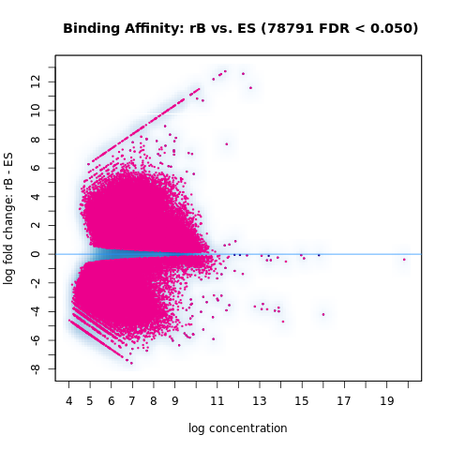|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotVolcano.png" target="_blank">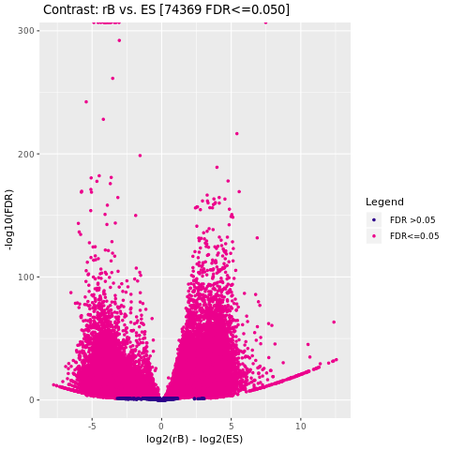|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotVolcano.png" target="_blank">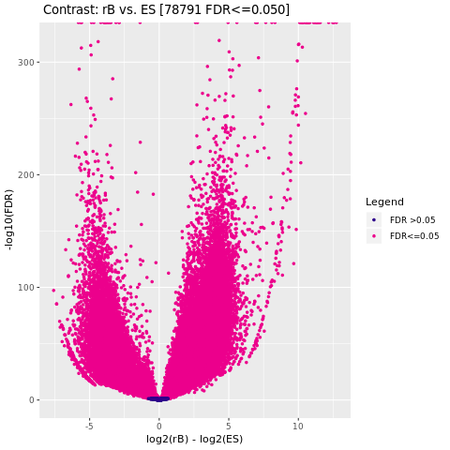|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotPCA.png" target="_blank">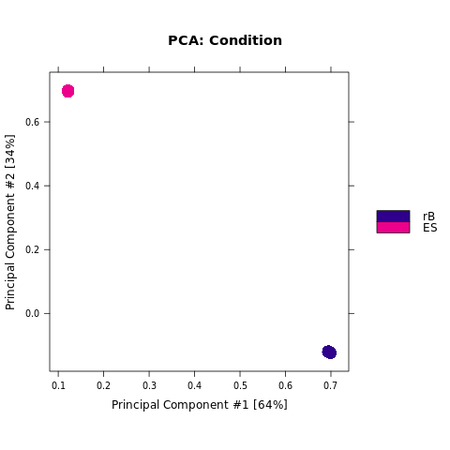|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotPCA.png" target="_blank">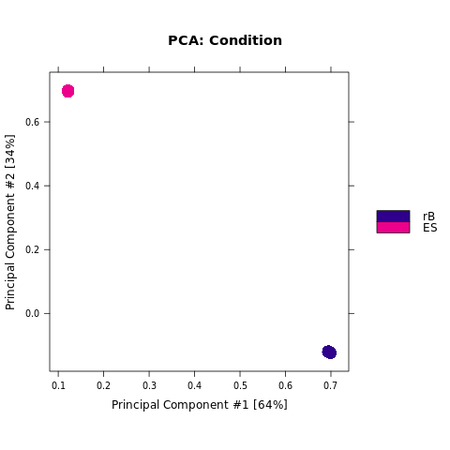|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotPCA_contrast.png" target="_blank">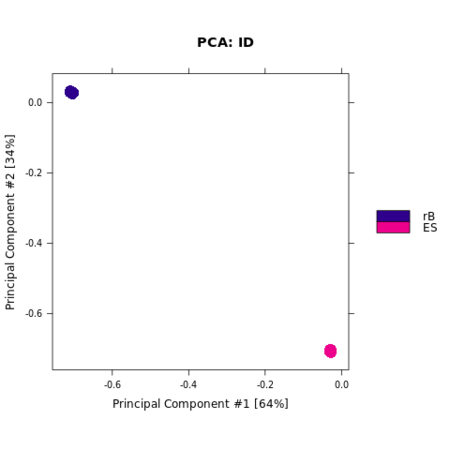|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotPCA_contrast.png" target="_blank">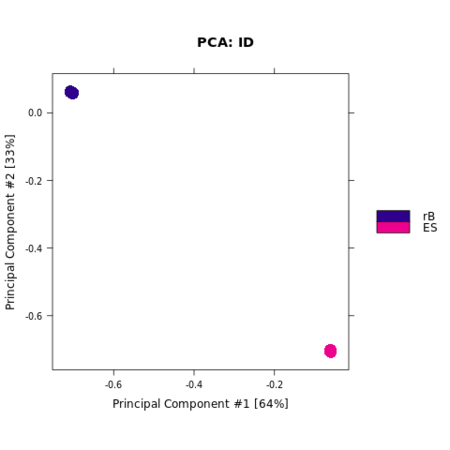|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_deseq2_plotBox.png" target="_blank">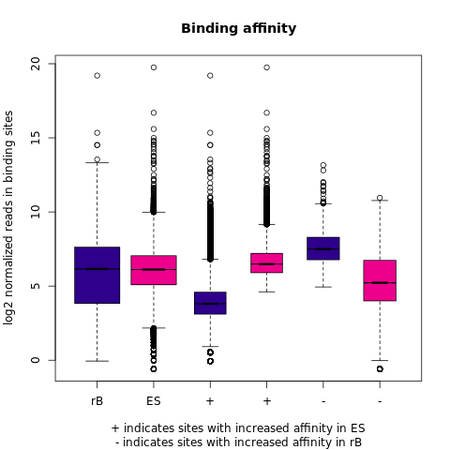|  <a href="../results/PRJNA481982/diffbind/rB_vs_ES/Diffbind_edgeR_plotBox.png" target="_blank">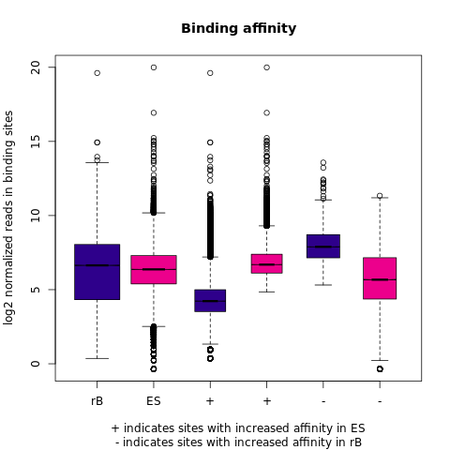|


### Condition: rB vs MEF

| Deseq2 | EdgeR |
| --- | --- |
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plot.png" target="_blank">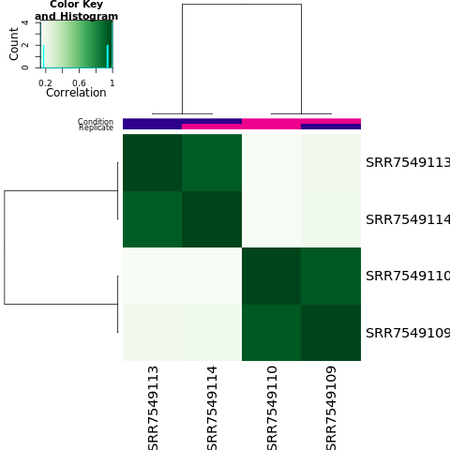|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plot.png" target="_blank">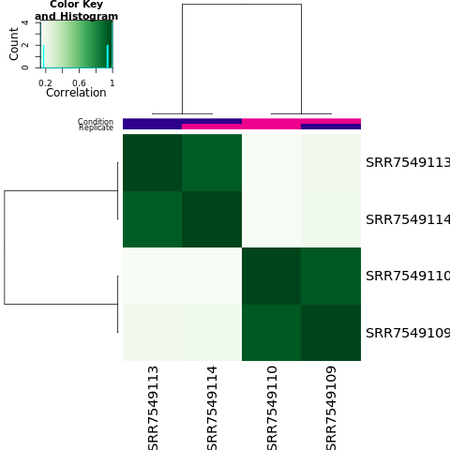|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotHeatmap.png" target="_blank">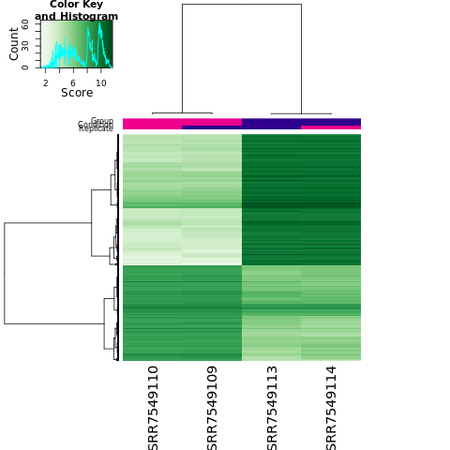|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotHeatmap.png" target="_blank">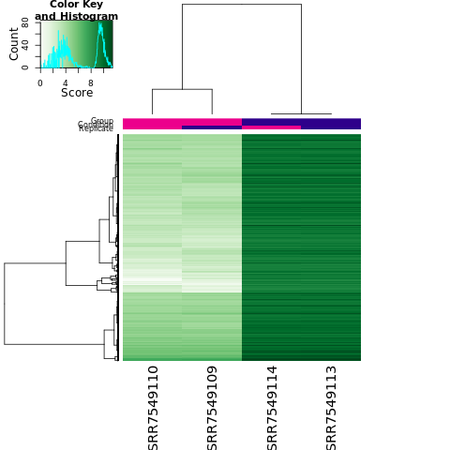|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotMA.png" target="_blank">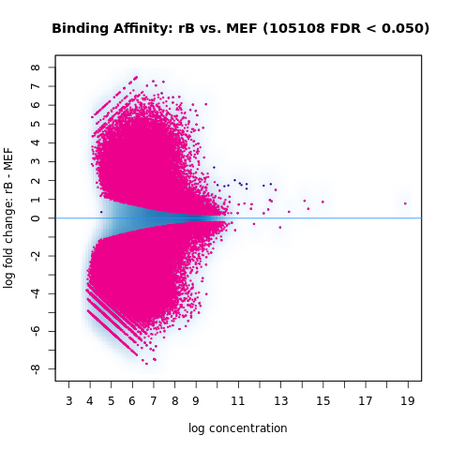|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotMA.png" target="_blank">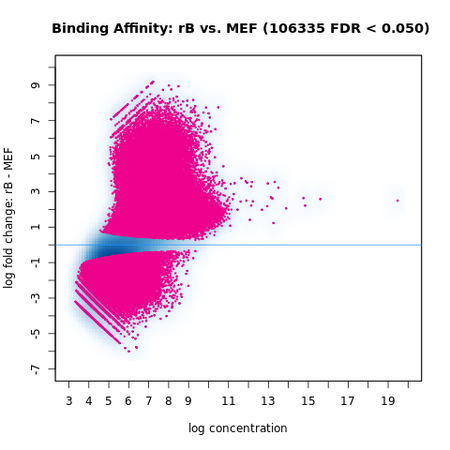|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotVolcano.png" target="_blank">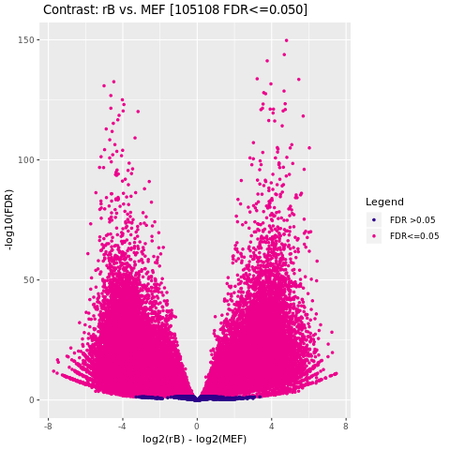|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotVolcano.png" target="_blank">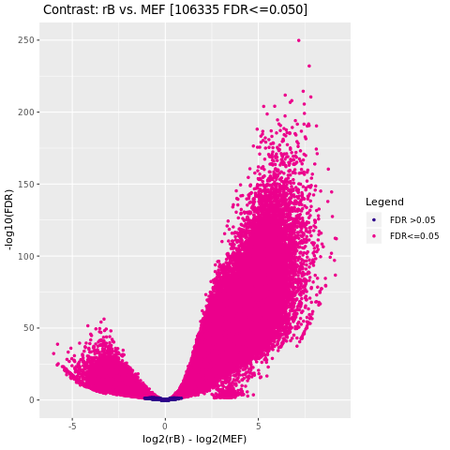|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotPCA.png" target="_blank">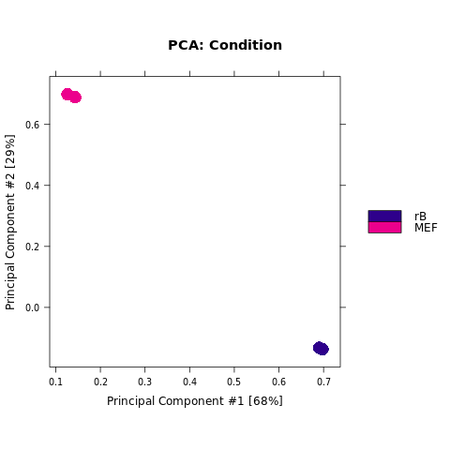|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotPCA.png" target="_blank">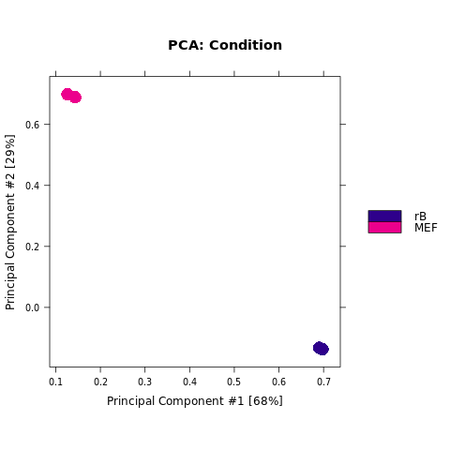|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotPCA_contrast.png" target="_blank">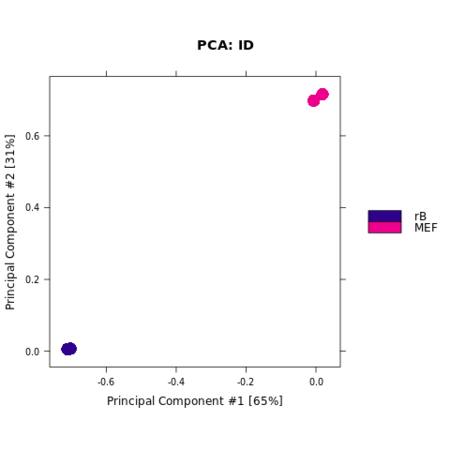|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotPCA_contrast.png" target="_blank">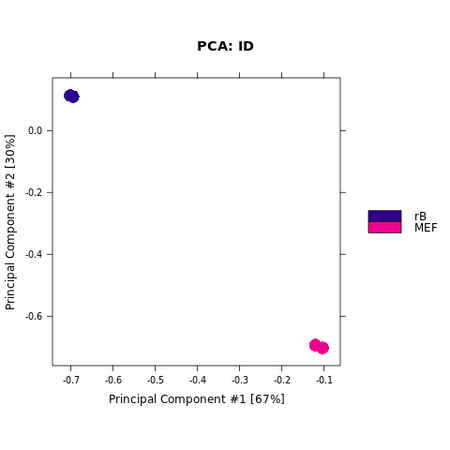|
|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_deseq2_plotBox.png" target="_blank">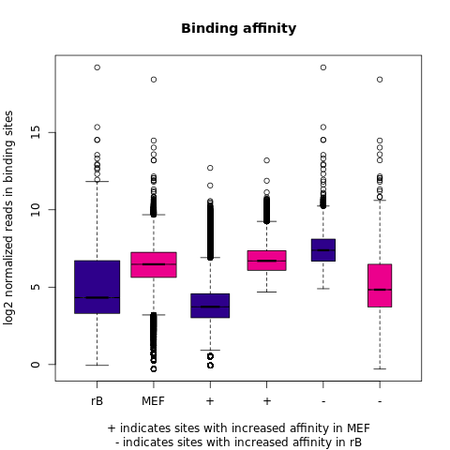|  <a href="../results/PRJNA481982/diffbind/rB_vs_MEF/Diffbind_edgeR_plotBox.png" target="_blank">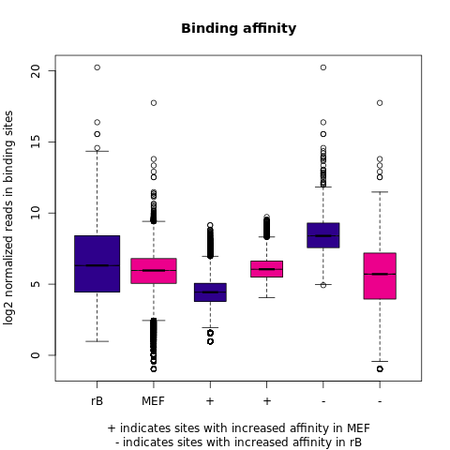|


### Condition: ES vs MEF

| Deseq2 | EdgeR |
| --- | --- |
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plot.png" target="_blank">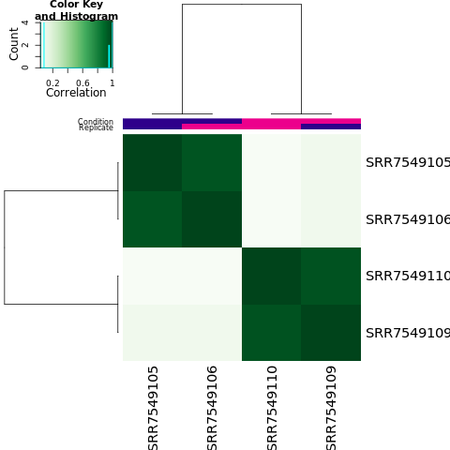|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plot.png" target="_blank">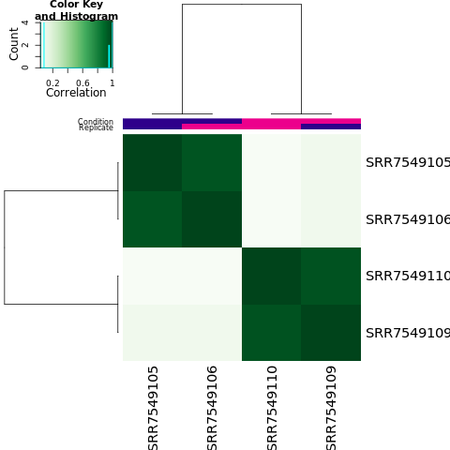|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotHeatmap.png" target="_blank">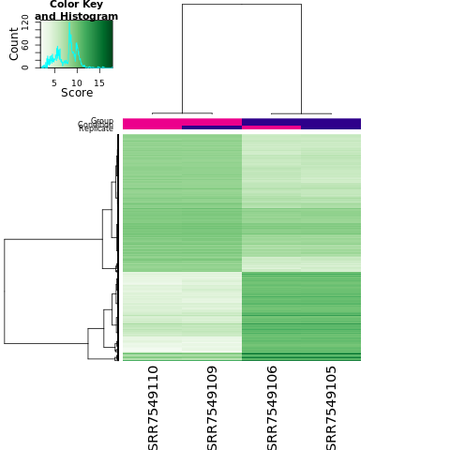|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotHeatmap.png" target="_blank">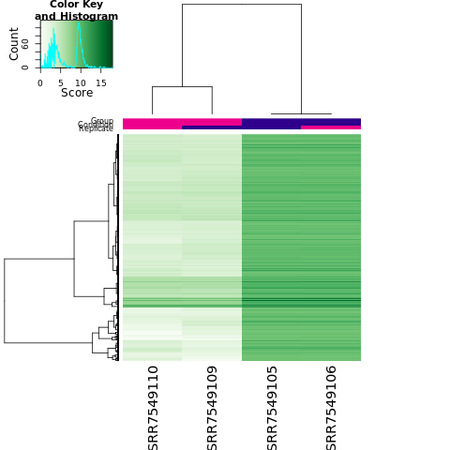|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotMA.png" target="_blank">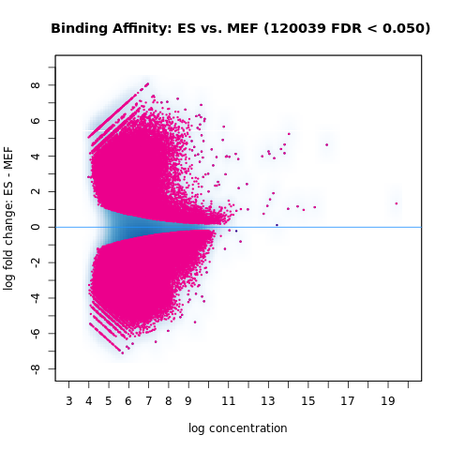|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotMA.png" target="_blank">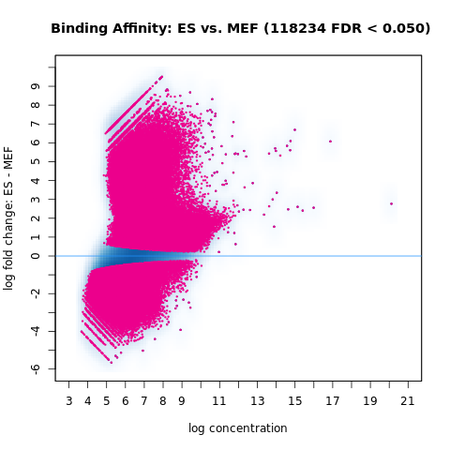|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotVolcano.png" target="_blank">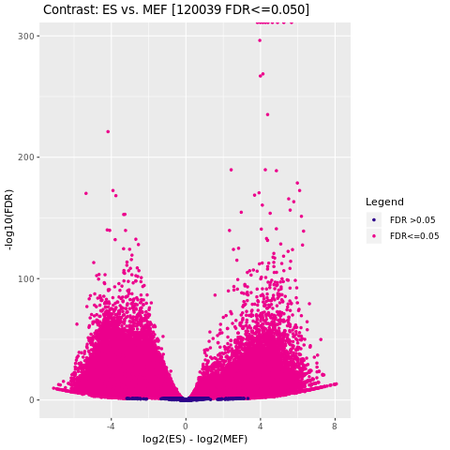|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotVolcano.png" target="_blank">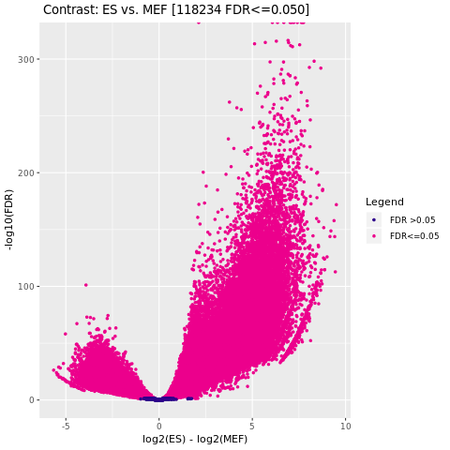|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotPCA.png" target="_blank">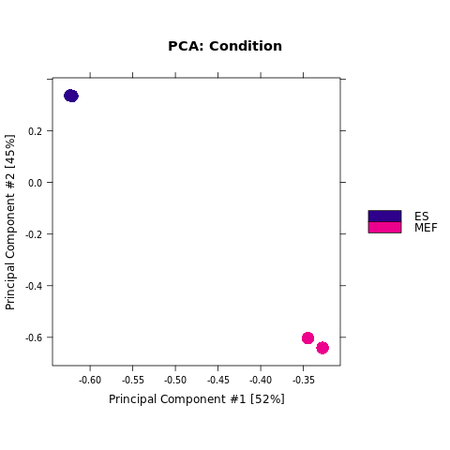|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotPCA.png" target="_blank">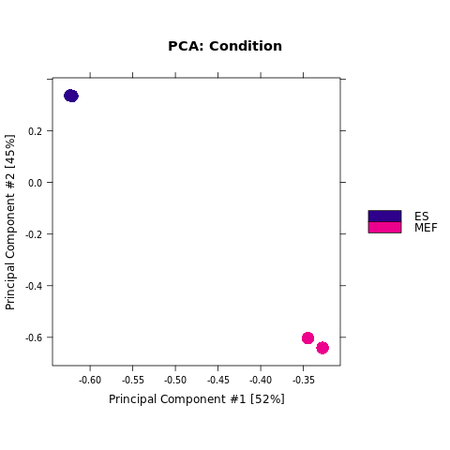|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotPCA_contrast.png" target="_blank">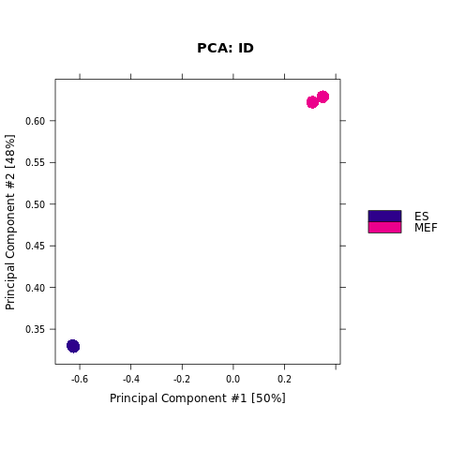|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotPCA_contrast.png" target="_blank">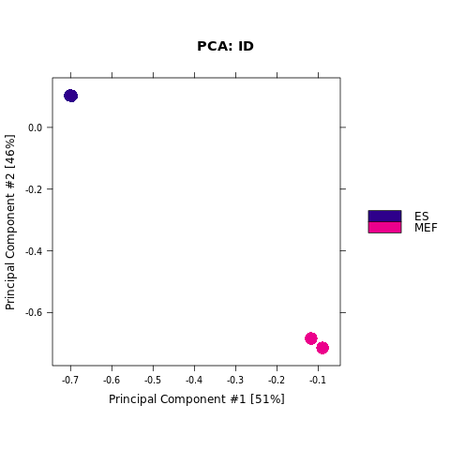|
|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_deseq2_plotBox.png" target="_blank">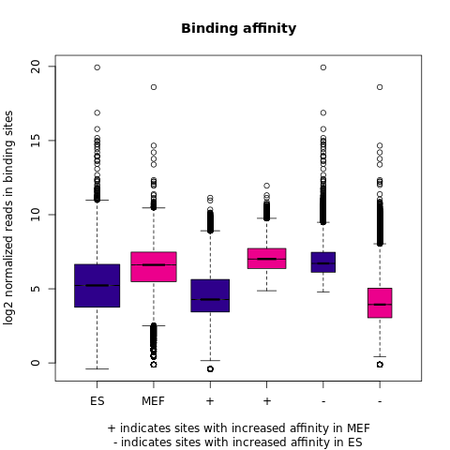|  <a href="../results/PRJNA481982/diffbind/ES_vs_MEF/Diffbind_edgeR_plotBox.png" target="_blank">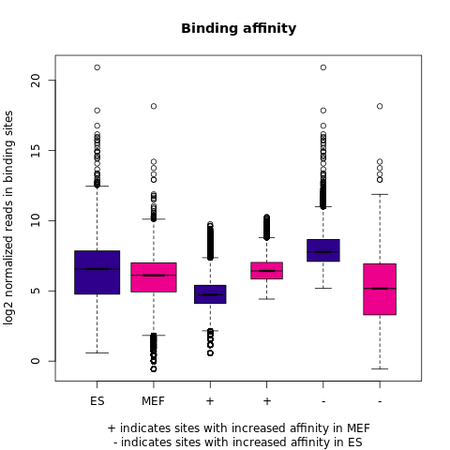|


In [9]:
img_size = 450
os.chdir(NOTEBOOKS)
result_dir = os.path.join(RESULTS, DATASET, 'diffbind')
for dirname, dirnames, filenames in os.walk(result_dir):
    for subdirname in dirnames:
        str_msg = '### Condition: ' + subdirname.replace('_', ' ') + '\n\n'
        str_msg += diffbind_table(os.path.join(dirname, subdirname), img_size, img_size)
        
        display(Markdown(str_msg))